# Flux estimates for each aircraft campaign

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import cftime
import numpy as np
import xarray as xr

import emergent_constraint as ec
import util

In [3]:
clobber = False
clobber_deep = False
air_parms = ec.get_parameters('default')

obj_air = {};
acs = {}; scs = {};
for constraint_type in ['ocean_constraint',]:
    model_input_lists = ec.get_model_tracer_lists(constraint_type)
    obj_air[constraint_type] = ec.whole_enchilada(clobber=clobber_deep, **model_input_lists)    
    acs[constraint_type] = obj_air[constraint_type].get_ac(**air_parms, clobber=clobber)

In [4]:
ac = acs['ocean_constraint']

In [5]:
dfo = ac.gradient_summary[['vg_obs', 'vg_obs_std', 'vg_ext', 'vg_ext_std',]]
dfo = dfo.rename(
    columns=dict(
        vg_obs='Observed Vertical Gradient [ppm]',
        vg_obs_std='Observed Gradient Uncertainty [ppm]',
        vg_ext='Simulated Land+Fossil Gradient [ppm]',
        vg_ext_std='Simulated Land+Fossil Gradient [ppm]',        
    )
)

# add columns for fluxes, flux errors, and start/end of 90-day windows?
dfo['Flux Date Start'] = [str(d[0]) for d in ac.campaign_flux.loc[dfo.index].flux_window_date_bound]
dfo['Flux Date End'] = [str(d[1]) for d in ac.campaign_flux.loc[dfo.index].flux_window_date_bound]
dfo['Flux Estimate [Pg C/yr]'] = ac.campaign_flux.loc[dfo.index].flux
dfo['Flux Uncertainty [Pg C/yr]'] = ac.campaign_flux.loc[dfo.index].flux_error

dfo

,Observed Vertical Gradient [ppm],Observed Gradient Uncertainty [ppm],Simulated Land+Fossil Gradient [ppm],Simulated Land+Fossil Gradient [ppm],Flux Date Start,Flux Date End,Flux Estimate [Pg C/yr],Flux Uncertainty [Pg C/yr]
campaign,,,,,,,,
HIPPO-1,-1.077490,0.465009,-0.023900,0.120961,2008-10-26,2009-01-24,-1.076390,0.639603
HIPPO-2,-0.162690,0.090161,-0.046578,0.084528,2009-08-17,2009-11-15,-0.167442,0.487200
HIPPO-3,-0.720060,0.204735,-0.173505,0.026798,2010-01-09,2010-04-09,-1.234981,0.957792
HIPPO-5,-0.315840,0.131419,-0.306847,0.060584,2011-06-04,2011-09-02,0.098226,0.575171
ORCAS-J,-1.185088,0.061978,-0.070150,0.112105,2015-11-01,2016-01-30,-1.135027,0.391570
ORCAS-F,-1.500263,0.062165,-0.075252,0.129962,2015-12-01,2016-02-29,-1.431401,0.561137
ATom-1,-0.301487,0.110063,-0.208775,0.058863,2016-05-17,2016-08-15,-0.109408,0.493874
ATom-2,-1.556420,0.134834,0.010962,0.081646,2016-11-15,2017-02-13,-1.567484,0.646107
ATom-3,-0.104060,0.131003,-0.156930,0.112341,2017-07-19,2017-10-17,0.251650,0.681117


In [6]:
dfo2 = ac.campaign_flux[['doy_mid', 'flux', 'flux_error']].rename(
    columns={
    'doy_mid': 'Day of Year',
    'flux': 'Flux Estimate [Pg C/yr]',
    'flux_error': 'Flux Uncertainty [Pg C/yr]',
})

# add columns for fluxes, flux errors, and start/end of 90-day windows?
dfo2['Flux Date Start'] = [str(d[0]) for d in ac.campaign_flux.loc[dfo2.index].flux_window_date_bound]
dfo2['Flux Date End'] = [str(d[1]) for d in ac.campaign_flux.loc[dfo2.index].flux_window_date_bound]
dfo2['Date'] = [d[0] + (d[1] - d[0])/2 for d in ac.campaign_flux.loc[dfo2.index].flux_window_date_bound]
dfo2 = dfo2[['Date', 'Flux Date Start', 'Flux Date End', 'Flux Estimate [Pg C/yr]', 'Flux Uncertainty [Pg C/yr]']]

comment_block = """# Southern Ocean flux estimates from aircraft observations described in Long et al. [2021]:
#   M. C. Long, B. B. Stephens, K. McKain, C. Sweeney, R. F. Keeling, E. A. Kort, E. J. Morgan, 
#     J. D. Bent, N. Chandra, F. Chevallier, R. Commane, B. C. Daube, P. B. Krummel, Z. Loh, 
#     I. T. Luijkx, D. Munro, P. Patra, W. Peters, M. Ramonet, C. Rödenbeck, A. Stavert, P. Tans, 
#     S. C. Wofsy, Strong Southern Ocean carbon uptake evident in airborne observations, 
#     Science (2021), https://doi.org/10.1126/science.abi4355.
#
# Flux estimates are valid for the region south of 45°S and over a period of 90 days
# prior to the end of each aircraft campaign.
#
# Column descriptions:
# Date: Mid-point of the 90 day period over which flux estimate applies
# Flux Date Start: start of 90 day period
# Flux Date End: end of 90 day period
# Flux Estimate [Pg C/yr]: the flux estimate for each campaign
# Flux Uncertainty [Pg C/yr]: the uncertainty in the flux estimate
#
"""
with open('flux-results/Long-etal-2021-aircraft-campaign-fluxes.csv', 'w') as fid:
    fid.write(comment_block)
    dfo2.to_csv(fid)
    
dfo2    

,Date,Flux Date Start,Flux Date End,Flux Estimate [Pg C/yr],Flux Uncertainty [Pg C/yr]
campaign,,,,,
HIPPO-1,2008-12-10,2008-10-26,2009-01-24,-1.076390,0.639603
HIPPO-2,2009-10-01,2009-08-17,2009-11-15,-0.167442,0.487200
HIPPO-3,2010-02-23,2010-01-09,2010-04-09,-1.234981,0.957792
HIPPO-5,2011-07-19,2011-06-04,2011-09-02,0.098226,0.575171
ORCAS-J,2015-12-16,2015-11-01,2016-01-30,-1.135027,0.391570
ORCAS-F,2016-01-15,2015-12-01,2016-02-29,-1.431401,0.561137
ATom-1,2016-07-01,2016-05-17,2016-08-15,-0.109408,0.493874
ATom-2,2016-12-30,2016-11-15,2017-02-13,-1.567484,0.646107
ATom-3,2017-09-02,2017-07-19,2017-10-17,0.251650,0.681117


In [7]:
abcd, pcov = ac.harmonic_fit

x = np.arange(1., 366., 1.) - 0.5 
y = ec.harmonic(x/365.25, *abcd) 

time = np.concatenate((
    cftime.date2num(xr.cftime_range('2009-07-01', '2009-12-31', freq='1D').values, units='days since 2009-01-01'),
    cftime.date2num(xr.cftime_range('2009-01-01', '2009-06-30', freq='1D').values, units='days since 2009-01-01'),
)) + 0.5

ndx = np.argsort(time)
assert (x == time[ndx]).all()
y = y[ndx]

climatology_bounds = xr.DataArray(
    np.vstack((
        time[ndx] - 0.5, 
        time[ndx] + 0.5 + cftime.date2num(cftime.datetime(2018, 1, 1), units='days since 2009-01-01'))).T,
    dims=('time', 'd2'),
    attrs={'long_name': 'nominal bounds for climatology'}
)        

dso = xr.Dataset(
    {'time': xr.DataArray(
        time[ndx],
        dims=('time'), 
        name='time',
    ),
     'flux': xr.DataArray(
        y,
        dims=('time'),
        coords={'time': x},
        name='fgco2',
        attrs={'long_name': 'Air-sea CO$_2$ flux (south of 45°S)', 
               'units': 'Pg C yr$^{-1}$',
              },
     ),
    }
)

dso["climatology_bounds"] = climatology_bounds
dso.time.attrs = {'units': 'days since 2009-01-01', 'long_name': 'time', 'climatology': 'climatology_bounds'}
dso.time.encoding['_FillValue'] = None

dso.attrs['source'] = 'flux climatology generated as a harmonic fit to Southern Ocean aircraft campaign CO2 data'
dso.attrs['reference'] = 'Long et al., Science (2021) https://doi.org/10.1126/science.abi4355'

dso

<xarray.Dataset>
Dimensions:             (time: 365, d2: 2)
Coordinates:
  * time                (time) float64 0.5 1.5 2.5 3.5 ... 362.5 363.5 364.5
Dimensions without coordinates: d2
Data variables:
    flux                (time) float64 -1.362 -1.369 -1.375 ... -1.348 -1.355
    climatology_bounds  (time, d2) float64 0.0 3.288e+03 1.0 ... 364.0 3.652e+03
Attributes:
    source:     flux climatology generated as a harmonic fit to Southern Ocea...
    reference:  Long et al., Science (2021) https://doi.org/10.1126/science.a...

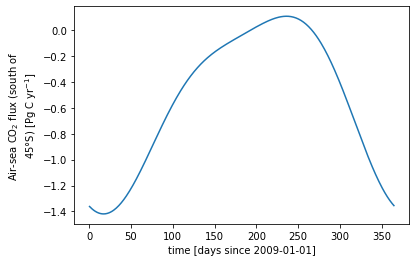

In [8]:
dso.flux.plot()

In [9]:
dso.to_netcdf('flux-results/Long-etal-2021-seasonal-flux-fit.nc')
dso.info()

xarray.Dataset {
dimensions:
	time = 365 ;
	d2 = 2 ;

variables:
	float64 time(time) ;
		time:units = days since 2009-01-01 ;
		time:long_name = time ;
		time:climatology = climatology_bounds ;
	float64 flux(time) ;
		flux:long_name = Air-sea CO$_2$ flux (south of 45°S) ;
		flux:units = Pg C yr$^{-1}$ ;
	float64 climatology_bounds(time, d2) ;
		climatology_bounds:long_name = nominal bounds for climatology ;

// global attributes:
	:source = flux climatology generated as a harmonic fit to Southern Ocean aircraft campaign CO2 data ;
	:reference = Long et al., Science (2021) https://doi.org/10.1126/science.abi4355 ;
}

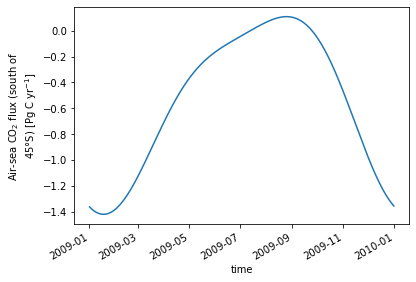

In [10]:
with xr.open_dataset('flux-results/Long-etal-2021-seasonal-flux-fit.nc') as ds:
    ds.flux.plot()